Dataset : https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

In [ ]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
import zipfile
from tensorflow import keras
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
zip = '/content/drive/MyDrive/Dataset_Kaggle/German Traffic Sign Recognition Benchmark.zip'
unzip = zipfile.ZipFile(zip, 'r')
unzip.extractall('/content/dataset')
unzip.close()

In [ ]:
data_dir = '/content/dataset'
train_dir = '/content/dataset/Train'
test_dir = '/content/dataset'

In [ ]:
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [ ]:
image_data = []
image_labels = []
for i in range(43):
    path = data_dir + '/Train/' + str(i)
    images = os.listdir(path)

    for img in images:
          image = cv2.imread(path + '/' + img)
          image_fromarray = Image.fromarray(image, 'RGB')
          resize_image = image_fromarray.resize((30, 30))
          image_data.append(np.array(resize_image))
          image_labels.append(i)

In [ ]:
image_data = np.array(image_data)
image_labels = np.array(image_labels)

In [ ]:
shuffle_indexes = np.arange(image_data.shape[0])
np.random.shuffle(shuffle_indexes)
image_data = image_data[shuffle_indexes]
image_labels = image_labels[shuffle_indexes]

In [ ]:
img_train, img_test, label_train, label_test = train_test_split(image_data, image_labels, test_size=0.2, random_state=42, shuffle=True)

In [ ]:
label_train = keras.utils.to_categorical(label_train, 43)
label_test = keras.utils.to_categorical(label_test, 43)

In [ ]:
augmetation = ImageDataGenerator(rotation_range=10,
                                 zoom_range=0.15,
                                 shear_range=0.15,
                                 fill_mode='nearest')


In [ ]:
model = keras.models.Sequential([    
    keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(30, 30, 3)),
    keras.layers.Conv2D(32, (3,3), activation='relu'),
    keras.layers.MaxPool2D((2, 2)),
    keras.layers.BatchNormalization(-1),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.MaxPool2D((2, 2)),
    keras.layers.BatchNormalization(-1),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(43, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 16)        448       
                                                                 
 conv2d_13 (Conv2D)          (None, 26, 26, 32)        4640      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_9 (Batc  (None, 13, 13, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_14 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 conv2d_15 (Conv2D)          (None, 9, 9, 128)        

In [ ]:
model.compile(optimizer='adam',
              loss=keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
early_stopping_monitor = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

In [ ]:
history = model.fit(augmetation.flow(img_train, label_train, batch_size=16), 
          epochs=30,
          validation_data = (img_test, label_test),
          batch_size=12,
          verbose=1,
          callbacks=[early_stopping_monitor])

Epoch 1/30
1961/1961 [==============================] - 115s 59ms/step - loss: 0.3669 - accuracy: 0.8944 - val_loss: 0.0607 - val_accuracy: 0.9809
Epoch 2/30
1961/1961 [==============================] - 111s 57ms/step - loss: 0.1065 - accuracy: 0.9685 - val_loss: 0.0652 - val_accuracy: 0.9809
Epoch 3/30
1961/1961 [==============================] - 111s 57ms/step - loss: 0.0815 - accuracy: 0.9757 - val_loss: 0.0258 - val_accuracy: 0.9916
Epoch 4/30
1961/1961 [==============================] - 111s 57ms/step - loss: 0.0768 - accuracy: 0.9769 - val_loss: 0.0435 - val_accuracy: 0.9864
Epoch 5/30
1961/1961 [==============================] - 113s 57ms/step - loss: 0.0586 - accuracy: 0.9834 - val_loss: 0.0226 - val_accuracy: 0.9943
Epoch 6/30
1961/1961 [==============================] - 111s 57ms/step - loss: 0.0586 - accuracy: 0.9832 - val_loss: 0.0292 - val_accuracy: 0.9920
Epoch 7/30
1961/1961 [==============================] - 111s 57ms/step - loss: 0.0401 - accuracy: 0.9888 - val_loss: 0

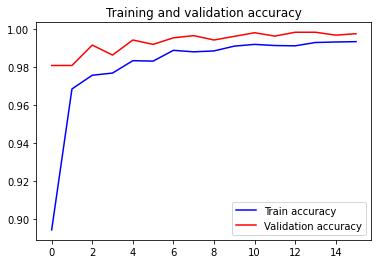

<Figure size 432x288 with 0 Axes>

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(accuracy, 'b', label='Train accuracy')
plt.plot(val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

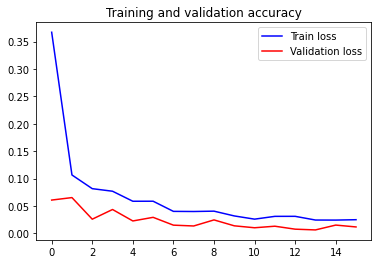

<Figure size 432x288 with 0 Axes>

In [50]:
plt.plot(loss, 'b', label='Train loss')
plt.plot(val_loss, 'r', label='Validation loss')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

In [ ]:
save_path = 'mymodel/'
tf.saved_model.save(model, save_path)

In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model('/content/mymodel')
tflite_model = converter.convert()
 
with tf.io.gfile.GFile('German_trafic_sign.tflite', 'wb') as f:
    f.write(tflite_model)